In [1]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator, FixedFormatter
import libs
from scipy.stats import norm

In [2]:
# Set global theme settings for plotting
plt.rcParams.update({
    'font.size': 20,          # Set font size
    'lines.linewidth': 3,     # Set default line thickness
    'axes.titlesize': 20,     # Title font size
    'axes.labelsize': 18,     # Axis label font size
    'xtick.labelsize': 14,    # X-tick label font size
    'ytick.labelsize': 14,    # Y-tick label font size
    'grid.color': 'gray',     # Grid color
    'grid.linestyle': '--',   # Grid line style
    'grid.linewidth': 0.5,    # Grid line width
    'legend.fontsize': 16     # Legend font size
})

In [3]:
human_Ud = 2.0
Kimetalsd = -0.009
human_popsize = 10000
mean_segregating = -human_Ud/Kimetalsd
stdv_segregating = np.sqrt(mean_segregating)
iterations = 1000

negative_epsilon = -0.001
positive_epsilon = 0.001

In [4]:
expected_min_Kim, std_error_min_Kim, expected_max_Kim, std_error_max_Kim = libs.get_expected_min_max_poisson_sample(mean_segregating, human_popsize, iterations)
interval_span = 10
segregating_mutations = np.linspace(expected_min_Kim-interval_span, expected_max_Kim+interval_span, 100)


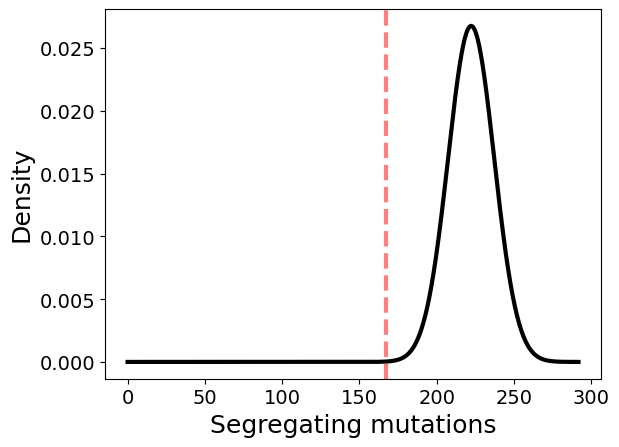

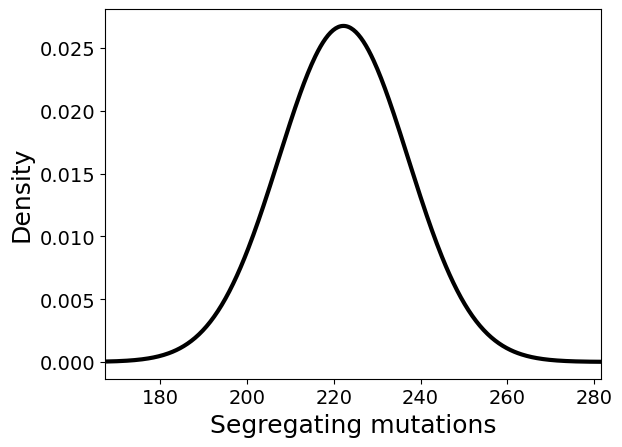

In [5]:
# Generatinf segregating mutations pdf
plottingsegregating_mutations = np.linspace(0, expected_max_Kim+interval_span, 1000)
pdf = norm.pdf(plottingsegregating_mutations, mean_segregating, stdv_segregating)

# Plot the PDF
plt.plot(plottingsegregating_mutations, pdf, color='black')
plt.axvline(x=expected_min_Kim, color='red', linestyle='--', alpha=0.5)
plt.xlabel('Segregating mutations')
plt.ylabel('Density')
plt.savefig('graphs/full_pdf_segregatingmutations.png', bbox_inches='tight')
plt.show()
plt.close()

# Plot the PDF
plt.plot(plottingsegregating_mutations, pdf, color='black')
plt.xlabel('Segregating mutations')
plt.ylabel('Density')
plt.xlim(expected_min_Kim, expected_max_Kim) # Replace xmin and xmax with desired values
plt.savefig('graphs/pdf_segregatingmutations.png', bbox_inches='tight')
plt.show()
plt.close()


In [6]:
#Generate growth rates and fitness
mult_growthrates = libs.get_growht_rate(segregating_mutations, mean_segregating, expected_min_Kim, expected_max_Kim, Kimetalsd, 0.0)
negative_epistasis_growthrates = libs.get_growht_rate(segregating_mutations, mean_segregating, expected_min_Kim, expected_max_Kim, Kimetalsd, negative_epsilon)
positive_epistasis_growthrates = libs.get_growht_rate(segregating_mutations, mean_segregating, expected_min_Kim, expected_max_Kim, Kimetalsd, positive_epsilon)

mult_fitness = libs.get_fitness(mult_growthrates)
negative_epistasis_fitness = libs.get_fitness(negative_epistasis_growthrates)
positive_epistasis_fitness = libs.get_fitness(positive_epistasis_growthrates)

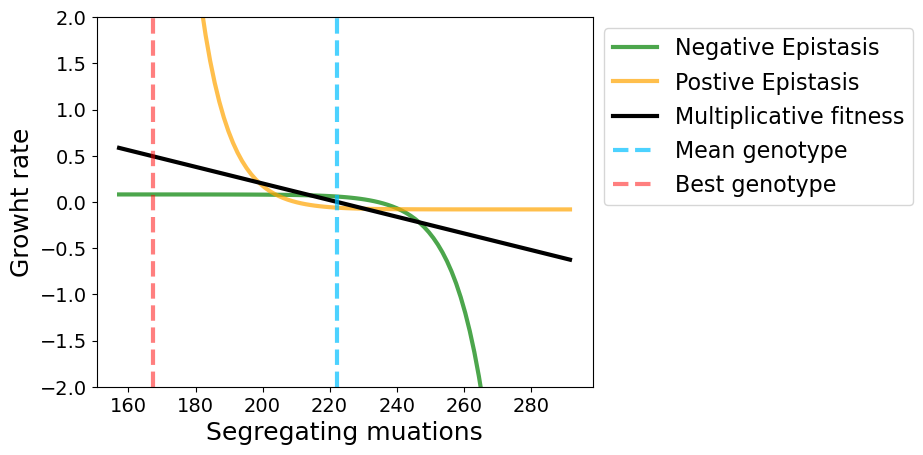

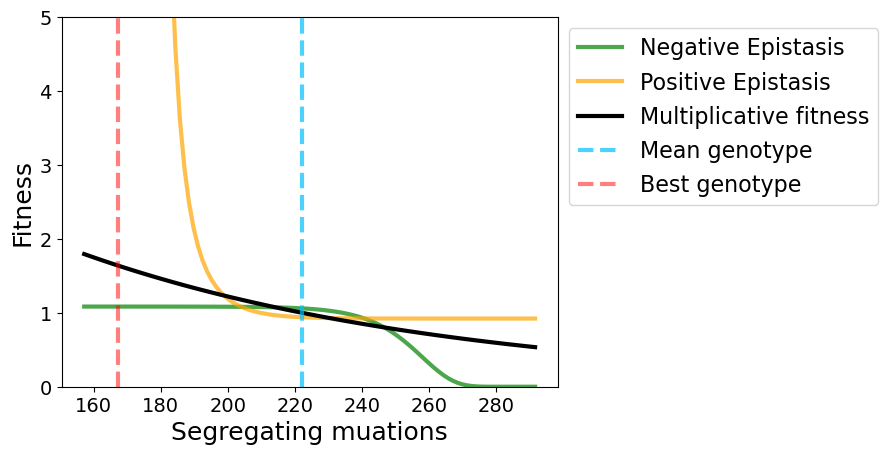

In [7]:
plt.plot(segregating_mutations, negative_epistasis_growthrates, label='Negative Epistasis', alpha=0.7, color='green')
plt.plot(segregating_mutations, positive_epistasis_growthrates, label='Postive Epistasis', alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_growthrates, label='Multiplicative fitness', color='black')
plt.xlabel('Segregating muations')
plt.ylabel('Growht rate')
plt.axvline(x=mean_segregating, color='deepskyblue', linestyle='--', label='Mean genotype', alpha=0.7)
plt.axvline(x=expected_min_Kim, color='red', linestyle='--', alpha=0.5, label='Best genotype')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(-2, 2)
#plt.savefig('graphs/growth_rates_model.png', bbox_inches='tight') 
plt.show()
plt.close()

plt.plot(segregating_mutations, negative_epistasis_fitness, label='Negative Epistasis', alpha=0.7, color='green')
plt.plot(segregating_mutations, positive_epistasis_fitness, label='Positive Epistasis', alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_fitness, label='Multiplicative fitness', color='black')
plt.xlabel('Segregating muations')
plt.ylabel('Fitness')
plt.axvline(x=mean_segregating, color='deepskyblue', linestyle='--', label='Mean genotype', alpha=0.7)
plt.axvline(x=expected_min_Kim, color='red', linestyle='--', alpha=0.5, label='Best genotype')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0, 5)
#plt.savefig('graphs/fitnessmodel.png', bbox_inches='tight') 
plt.show()
plt.close()

In [8]:
#treat weak espistasis
weak_positive_epsilon = 0.0001
weak_negative_epsilon = -0.0001

weak_negative_epistasis_growthrates = libs.get_growht_rate(segregating_mutations, mean_segregating, expected_min_Kim, expected_max_Kim, Kimetalsd, weak_negative_epsilon)
weak_positive_epistasis_growthrates = libs.get_growht_rate(segregating_mutations, mean_segregating, expected_min_Kim, expected_max_Kim, Kimetalsd, weak_positive_epsilon)

weak_negative_epistasis_fitness = libs.get_fitness(weak_negative_epistasis_growthrates)
weak_positive_epistasis_fitness = libs.get_fitness(weak_positive_epistasis_growthrates)

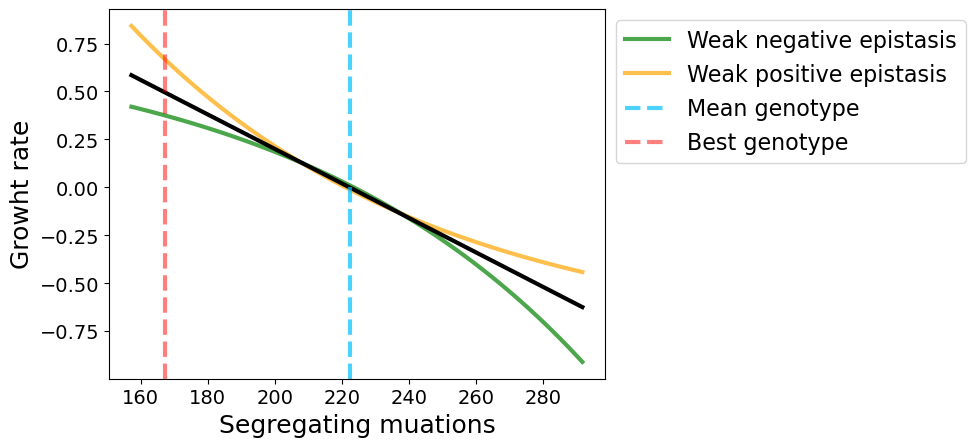

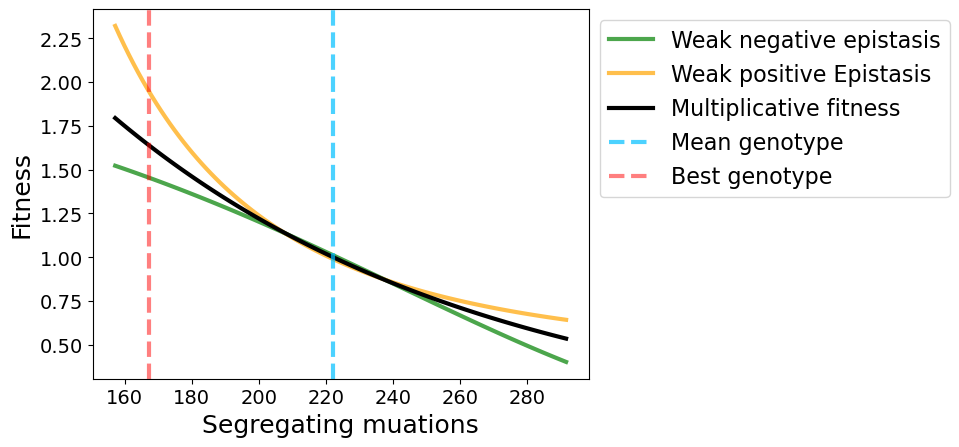

In [9]:
plt.plot(segregating_mutations, weak_negative_epistasis_growthrates, label='Weak negative epistasis', alpha=0.7, color='green')
plt.plot(segregating_mutations, weak_positive_epistasis_growthrates, label='Weak positive epistasis' , alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_growthrates, color='black')
plt.xlabel('Segregating muations')
plt.ylabel('Growht rate')
plt.axvline(x=mean_segregating, color='deepskyblue', linestyle='--', label='Mean genotype', alpha=0.7)
plt.axvline(x=expected_min_Kim, color='red', linestyle='--', alpha=0.5, label='Best genotype')
#plt.axhline(y = 0, linestyle = '--', linewidth=0.5) 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('graphs/growth_rates_model.png', bbox_inches='tight') 
plt.show()
plt.close()


plt.plot(segregating_mutations, weak_negative_epistasis_fitness, label='Weak negative epistasis', alpha=0.7, color='green')
plt.plot(segregating_mutations, weak_positive_epistasis_fitness, label='Weak positive Epistasis', alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_fitness, label='Multiplicative fitness', color='black')
plt.xlabel('Segregating muations')
plt.ylabel('Fitness')
plt.axvline(x=mean_segregating, color='deepskyblue', linestyle='--', label='Mean genotype', alpha=0.7)
plt.axvline(x=expected_min_Kim, color='red', linestyle='--', alpha=0.5, label='Best genotype')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.savefig('graphs/fitnessmodel.png', bbox_inches='tight') 
#plt.axhline(y = 1, linestyle = '--', linewidth=0.5) 
plt.show()
plt.close()


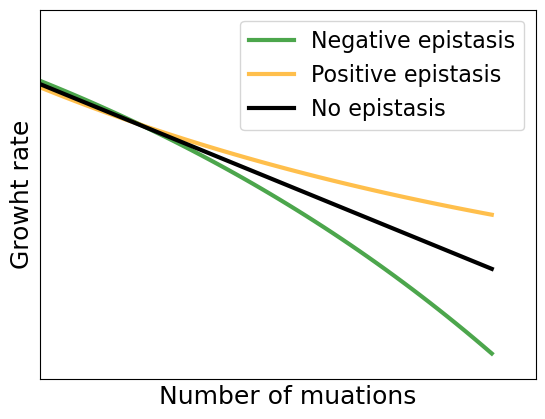

In [30]:
plt.plot(segregating_mutations, weak_negative_epistasis_growthrates, label='Negative epistasis', alpha=0.7, color='green')
plt.plot(segregating_mutations, weak_positive_epistasis_growthrates, label='Positive epistasis' , alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_growthrates, label='No epistasis', color='black')
plt.xlabel('Number of muations')
plt.ylabel('Growht rate')
#plt.axvline(x=mean_segregating, color='deepskyblue', linestyle='--', label='Mean genotype', alpha=0.7)
#plt.axvline(x=expected_min_Kim, color='red', linestyle='--', alpha=0.5, label='Best genotype')
plt.xlim(left=mean_segregating)
plt.ylim(top=0.25)
plt.gca().axes.get_xaxis().set_ticks([])
plt.gca().axes.get_yaxis().set_ticks([])
plt.legend()
plt.savefig('graphs/epistasiscases.png', bbox_inches='tight') 
#plt.axhline(y = 1, linestyle = '--', linewidth=0.5) 
plt.show()
plt.close()

In [11]:
#treat strong espistasis
strong_negative_epsilon = -0.005
strong_positive_epsilon = 0.005

strong_negative_epistasis_growthrates = libs.get_growht_rate(segregating_mutations, mean_segregating, expected_min_Kim, expected_max_Kim, Kimetalsd, strong_negative_epsilon)
strong_positive_epistasis_growthrates = libs.get_growht_rate(segregating_mutations, mean_segregating, expected_min_Kim, expected_max_Kim, Kimetalsd, strong_positive_epsilon)

strong_negative_epistasis_fitness = libs.get_fitness(strong_negative_epistasis_growthrates)
strong_positive_epistasis_fitness = libs.get_fitness(strong_positive_epistasis_growthrates)

/home/uliseshmc/Documents/Proyectos/HighUd_populationgenetics/HighUd_Epistasis_Lead/libs.py:68: RuntimeWarning: overflow encountered in exp
  fitness = np.exp(growth_rate)


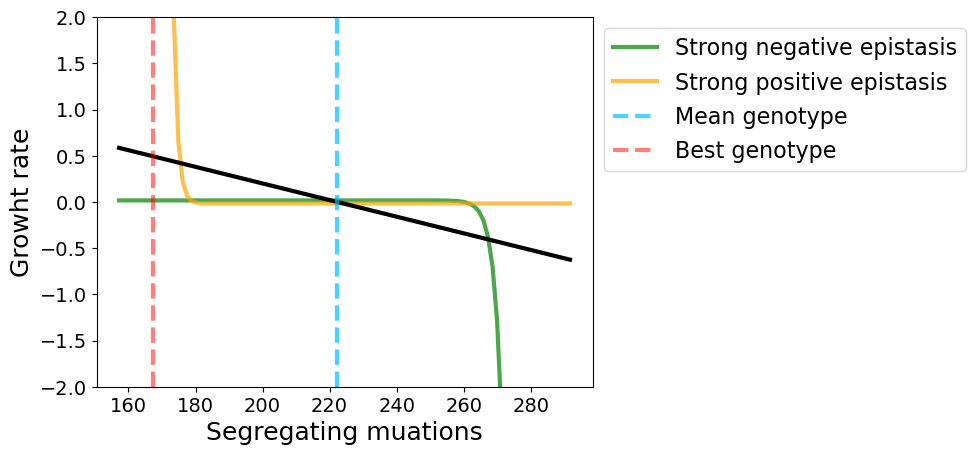

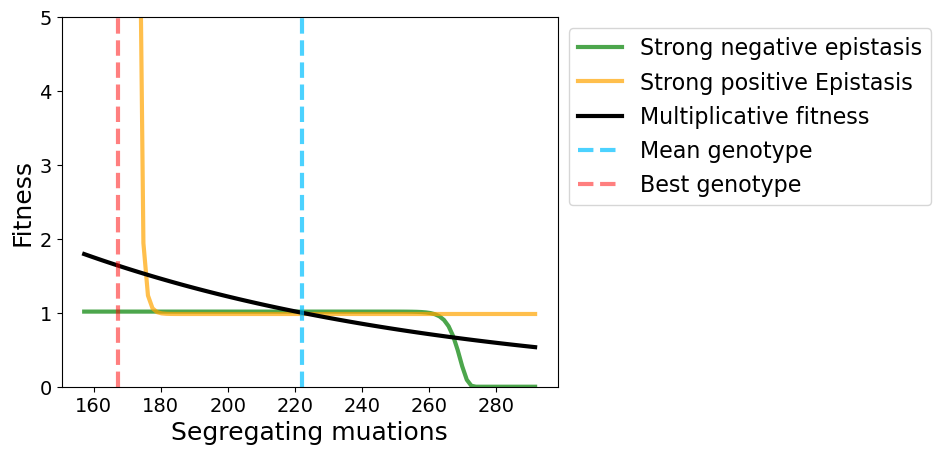

In [12]:
plt.plot(segregating_mutations, strong_negative_epistasis_growthrates, label='Strong negative epistasis', alpha=0.7, color='green')
plt.plot(segregating_mutations, strong_positive_epistasis_growthrates, label='Strong positive epistasis' , alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_growthrates, color='black')
plt.xlabel('Segregating muations')
plt.ylabel('Growht rate')
plt.axvline(x=mean_segregating, color='deepskyblue', linestyle='--', label='Mean genotype', alpha=0.7)
plt.axvline(x=expected_min_Kim, color='red', linestyle='--', alpha=0.5, label='Best genotype')
#plt.axhline(y = 0, linestyle = '--', linewidth=0.5) 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(-2, 2)
plt.show()
plt.close()


plt.plot(segregating_mutations, strong_negative_epistasis_fitness, label='Strong negative epistasis', alpha=0.7, color='green')
plt.plot(segregating_mutations, strong_positive_epistasis_fitness, label='Strong positive Epistasis', alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_fitness, label='Multiplicative fitness', color='black')
plt.xlabel('Segregating muations')
plt.ylabel('Fitness')
plt.axvline(x=mean_segregating, color='deepskyblue', linestyle='--', label='Mean genotype', alpha=0.7)
plt.axvline(x=expected_min_Kim, color='red', linestyle='--', alpha=0.5, label='Best genotype')
#plt.axvline(x=mean_segregating - 3*stdv_segregating, color='blue', linestyle='--', alpha=0.7)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylim(0, 5)
#plt.axhline(y = 1, linestyle = '--', linewidth=0.5) 
plt.show()
plt.close()

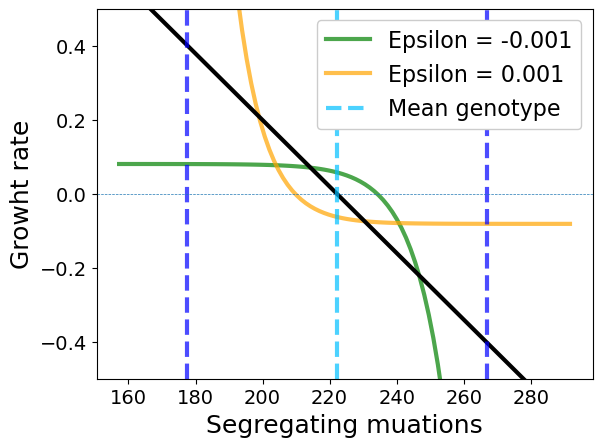

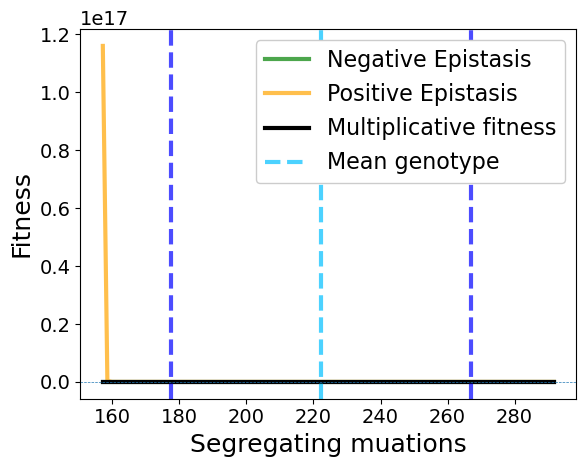

In [13]:
arbritrary_negative_epistasis_growthrates = libs.get_growht_rate(segregating_mutations, mean_segregating, expected_min_Kim, expected_max_Kim, Kimetalsd, negative_epsilon)
arbritrary_positive_epistasis_growthrates = libs.get_growht_rate(segregating_mutations, mean_segregating, expected_min_Kim, expected_max_Kim, Kimetalsd, positive_epsilon)

plt.plot(segregating_mutations, arbritrary_negative_epistasis_growthrates, label='Epsilon = ' + str(negative_epsilon), alpha=0.7, color='green')
plt.plot(segregating_mutations, arbritrary_positive_epistasis_growthrates, label='Epsilon = ' + str(positive_epsilon), alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_growthrates, color='black')
plt.xlabel('Segregating muations')
plt.ylabel('Growht rate')
plt.axvline(x=mean_segregating, color='deepskyblue', linestyle='--', label='Mean genotype', alpha=0.7)
plt.axvline(x=mean_segregating + 3*stdv_segregating, color='blue', linestyle='--', alpha=0.7)
plt.axvline(x=mean_segregating - 3*stdv_segregating, color='blue', linestyle='--', alpha=0.7)
plt.axhline(y = 0, linestyle = '--', linewidth=0.5) 
plt.legend(framealpha=1)
plt.ylim(-0.5, 0.5)
plt.show()
plt.close()

mult_fitness = libs.get_fitness(mult_growthrates)
negative_epistasis_fitness = libs.get_fitness(arbritrary_negative_epistasis_growthrates)
positive_epistasis_fitness = libs.get_fitness(arbritrary_positive_epistasis_growthrates)

plt.plot(segregating_mutations, negative_epistasis_fitness, label='Negative Epistasis', alpha=0.7, color='green')
plt.plot(segregating_mutations, positive_epistasis_fitness, label='Positive Epistasis', alpha=0.7, color = 'orange')
plt.plot(segregating_mutations, mult_fitness, label='Multiplicative fitness', color='black')
plt.xlabel('Segregating muations')
plt.ylabel('Fitness')
plt.axvline(x=mean_segregating, color='deepskyblue', linestyle='--', label='Mean genotype', alpha=0.7)
plt.axvline(x=mean_segregating + 3*stdv_segregating, color='blue', linestyle='--', alpha=0.7)
plt.axvline(x=mean_segregating - 3*stdv_segregating, color='blue', linestyle='--', alpha=0.7)
plt.legend(framealpha=1)
#plt.ylim(0, 4)
plt.axhline(y = 1, linestyle = '--', linewidth=0.5) 
plt.show()
plt.close()